# Stroke Analysis 
## (EDA + Preparing data + Feature Engineering + Modeling)
### (Create by Thanit Janprakaisaeng or PT_Jump)

I'm fresh graduated from Khon Kean University (Industrial Engineering). This my first master report that I make it for 2 weeks and study a lots of knowleages of data science for 5 months when I was college. I interesting in this dataset from Kaggle and many notebooks from Kalggle, that help me up to be a good data science. If you wathch this notebook you can comment it for my improving. Let's enjoy!!!

### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12) stroke: 1 if the patient had a stroke or 0 if not
Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Loading Library

In [1]:
#Library data trasfroming 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Getting Data 

In [2]:
df = pd.read_csv('C:/Users/Thanit/Desktop/Project Classification (Stroke Prediction)/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Summary ( Check for missing values )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Check unique values in each of column
print ("\nMissing values : \n", df.isnull().sum()) # bmi is feature got 201 missing values
print ("\nUnique values :  \n",df.nunique())


Missing values : 
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Unique values :  
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


## Initial Insights About Dataset
    
1. Data from bmi feature is missing 201 values.
2. Both Categorical and numerical features are present.
    - Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
    - Binary Numerical Features: hypertension,heart_disease, stroke
    - Continous Numerical Features: age, avg_glucose_level, bmi

## Exploratory Data Analysis(EDA)

### Visualization Continous Numerical Features

In [5]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None ):
    sns.histplot(col, bins=bins,ax=ax, kde=True)
    ax.set_title(f'Histogram of {title}',fontsize=25)
    ax.set_xlabel(xlabel)

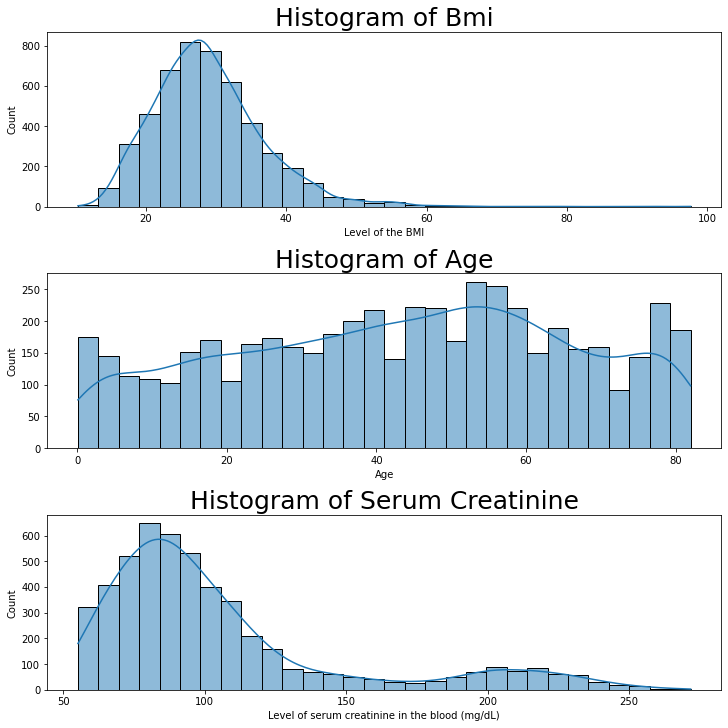

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show();

### Visualization Categorical Features

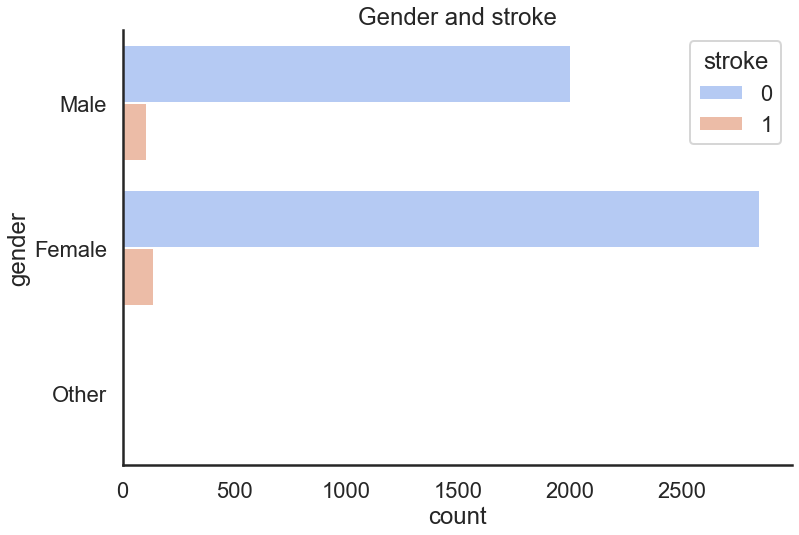

In [7]:
# Gender plot groupby stroke
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 1)

sns.countplot(y = 'gender', hue = 'stroke', data = df, palette = 'coolwarm')
plt.title('Gender and stroke')
sns.despine();

- No Ohter catagorical 

This plot doesn't make clear which gerder got how many number of stroke. 

In [8]:
df.groupby(['gender', 'stroke'])['stroke'].count()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

- Number of stroke in female more than male.
- Auctully 'Other' gots 1 person but the plot didn't make clear with investagating by eyes. 

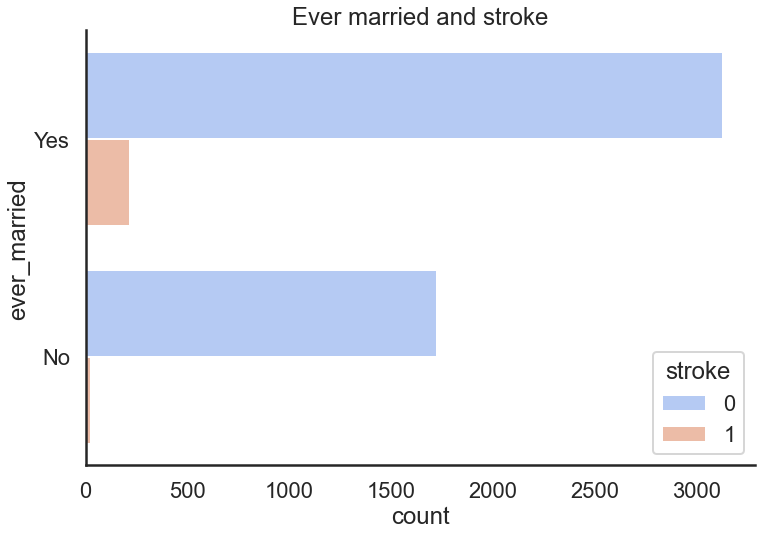

In [9]:
# Ever married plot groupby stroke
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 1)

sns.countplot(y = 'ever_married', hue = 'stroke', data = df, palette = 'coolwarm')
plt.title('Ever married and stroke')
sns.despine();

In [10]:
df.groupby(['ever_married', 'stroke'])['stroke'].count()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64

- Number of 'Ever married' (yes) have stroke more than 'Not ever married' (no)

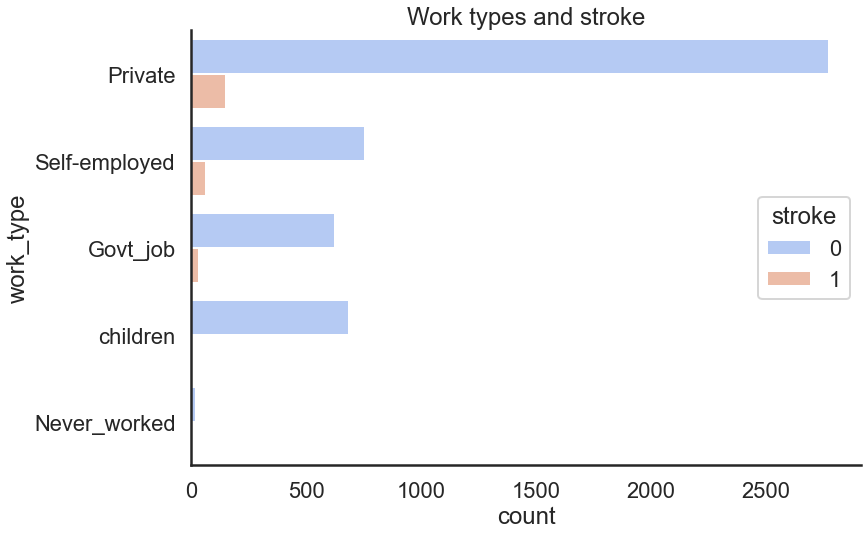

In [11]:
# Work_type plot groupby stroke
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 1)

sns.countplot(y = 'work_type', hue = 'stroke', data = df, palette = 'coolwarm')
plt.title('Work types and stroke')
sns.despine();

In [12]:
df.groupby(['work_type', 'stroke'])['stroke'].count()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64

- The most number of group be stroke are 'Private'
- And the less number of group be stroke are 'Children'

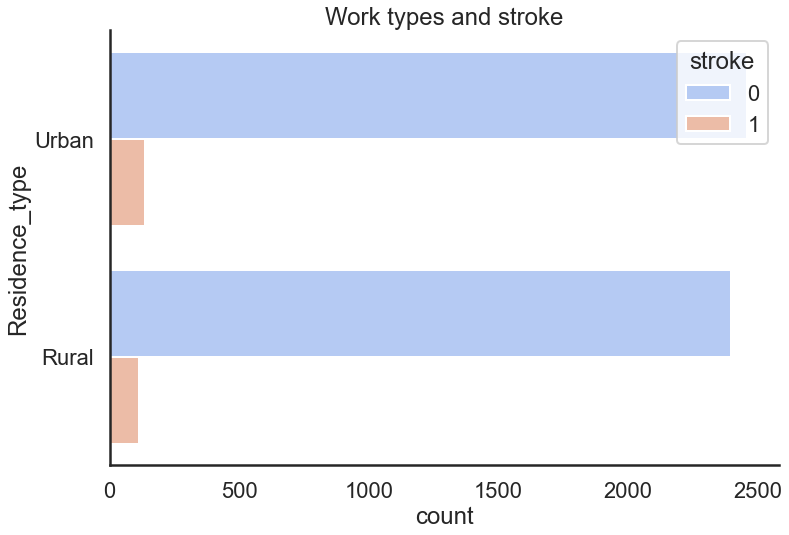

In [13]:
# Residence_type plot groupby stroke
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 1)

sns.countplot(y = 'Residence_type', hue = 'stroke', data = df, palette = 'coolwarm')
plt.title('Work types and stroke')
sns.despine();

In [14]:
df.groupby(['Residence_type', 'stroke'])['stroke'].count()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64

- Number of group 'Urban' be stroke more than 'Rural'

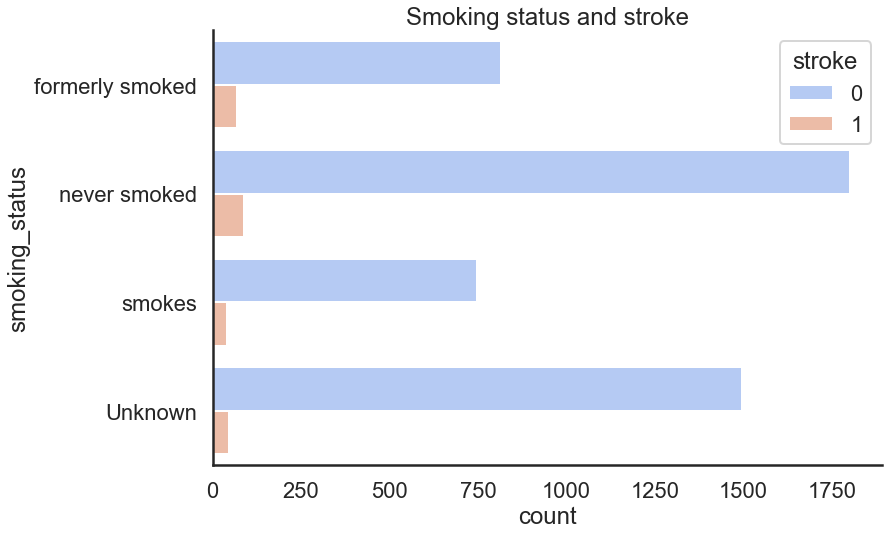

In [15]:
# smoking_status plot groupby stroke
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 1)

sns.countplot(y = 'smoking_status', hue = 'stroke', data = df, palette = 'coolwarm')
plt.title('Smoking status and stroke')
sns.despine();

In [16]:
df.groupby(['smoking_status', 'stroke'])['stroke'].count()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

- The most number of group be stroke are 'Never smoked '
- And the less number of group be stroke are 'smokes'

### Visualization Binary Numerical Features

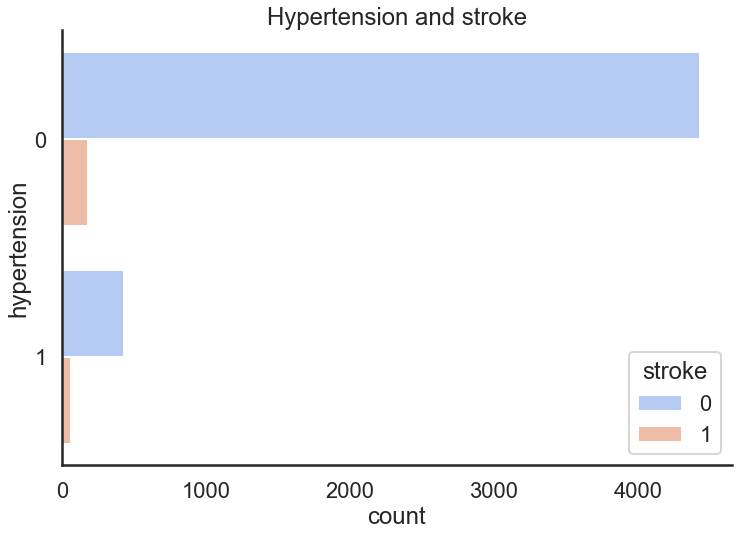

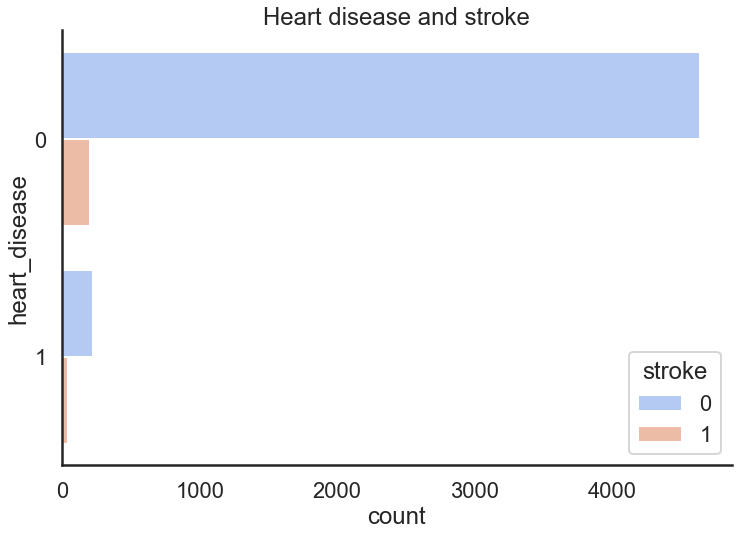

In [17]:
# hypertension plot groupby stroke
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 1)

sns.countplot(y = 'hypertension', hue = 'stroke', data = df, palette = 'coolwarm')
plt.title('Hypertension and stroke')
sns.despine();

# heart_disease plot groupby stroke
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 1)

sns.countplot(y = 'heart_disease', hue = 'stroke', data = df, palette = 'coolwarm')
plt.title('Heart disease and stroke')
sns.despine();

In [18]:
df.groupby(['hypertension', 'stroke'])['stroke'].count()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64

In [19]:
df.groupby(['heart_disease', 'stroke'])['stroke'].count()

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64

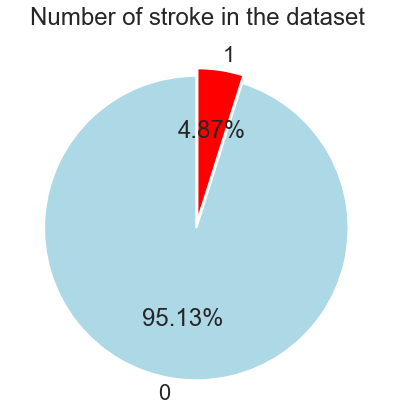

In [20]:
# Number of all stroke '1' and not stroke '2' 
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=False, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

- Ratio of stroke in this dataset is 4.87%

### Correlation matrix 

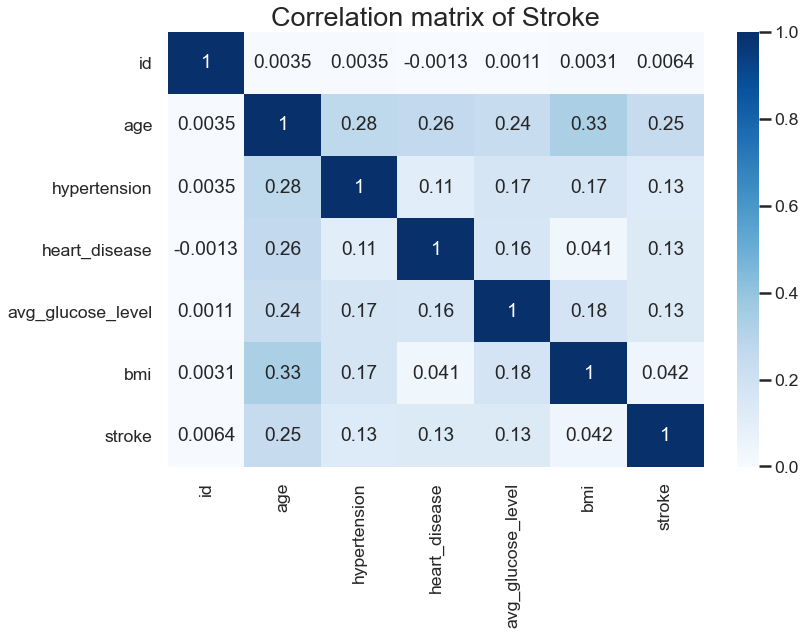

In [21]:
plt.figure(figsize=(12,8))
sns.set_context("poster", font_scale = 0.8)
sns.heatmap(df.corr(), cmap = "Blues", annot = True)
plt.title('Correlation matrix of Stroke', fontsize = 27 );

# Preprocessing Data 

## Library for preprocessing data 

In [22]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

### Preparing data in column "bmi" (Fix missing value)
#### Adult Body Mass Index
#### BMI is a person’s weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness.

#### To calculate BMI, see the Adult BMI Calculator or determine BMI by finding your height and weight in this BMI Index Chartexternal icon.

- If your BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to <25, it falls within the healthy weight range.
- If your BMI is 25.0 to <30, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obesity range.

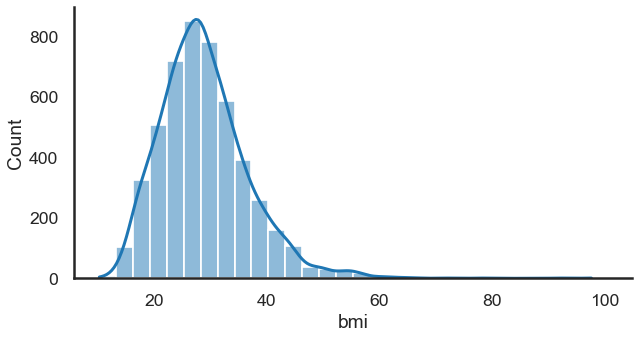

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="bmi", binwidth=3, kde=True);
sns.despine();

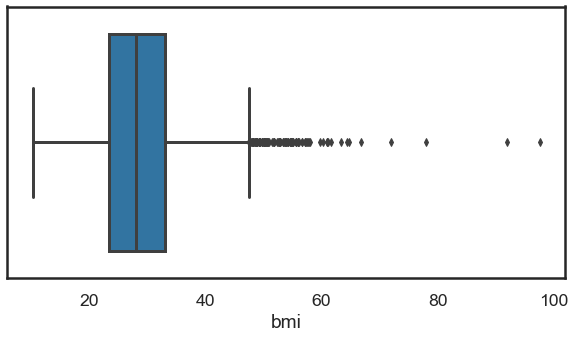

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="bmi");

- too many of outliners in this plot

In [25]:
# Calculation number of outliners
## Quartile calculations
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

##IQR calculation
IQR = Q3 - Q1

print('1st Quartile:', Q1)
print('1st Quartile:',Q3)
print('IQR:',IQR)

## Calculation of Min point and Max point of box plot above
Maximum_point = (Q3 + 1.5 * IQR)
Minimum_point = (Q1 - 1.5 * IQR)

print('Maximum_point:', Maximum_point)
print('Minimum_point', Minimum_point)

## counting number of outliners 
counter_outliner = ((df['bmi'] < Minimum_point) | (df['bmi'] > Maximum_point)).sum()
print("Number of outliner:", counter_outliner)

1st Quartile: 23.5
1st Quartile: 33.1
IQR: 9.600000000000001
Maximum_point: 47.5
Minimum_point 9.099999999999998
Number of outliner: 110


In [26]:
bmi_outliers = df.loc[df['bmi'] > Maximum_point]
bmi_outliers['bmi'].shape

print(bmi_outliers['stroke'].value_counts())

0    108
1      2
Name: stroke, dtype: int64


In [27]:
df['bmi'].describe() 

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

- In order to make the dataset balanced we will use the package SMOTE for oversampling. Moreover to fix the missing values in the BMI columns we use a imputation technics based on the KNN.

In [28]:
# Using KNNImputer for making dataset balanced by SMOTE for oversampling
imputer = KNNImputer(n_neighbors=4, weights="uniform")
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [29]:
# Check missing value again
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Transforming Categorical Features to Lable Encoding

In [30]:
#  Using Lable encoding from sklearn
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,1,1
1,3610,0,82,0,0,1,3,0,3588,162,2,1
2,2151,1,101,0,1,1,2,0,2483,199,2,1
3,4226,0,70,0,0,1,2,1,3385,218,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


## Feature Engineering

### Feature Ranking

Feature ranking:
1. feature 1 (0.254835)
2. feature 7 (0.247273)
3. feature 8 (0.222408)
4. feature 9 (0.085714)
5. feature 5 (0.059447)
6. feature 6 (0.034974)
7. feature 0 (0.033809)
8. feature 2 (0.022671)
9. feature 3 (0.021325)
10. feature 4 (0.017543)


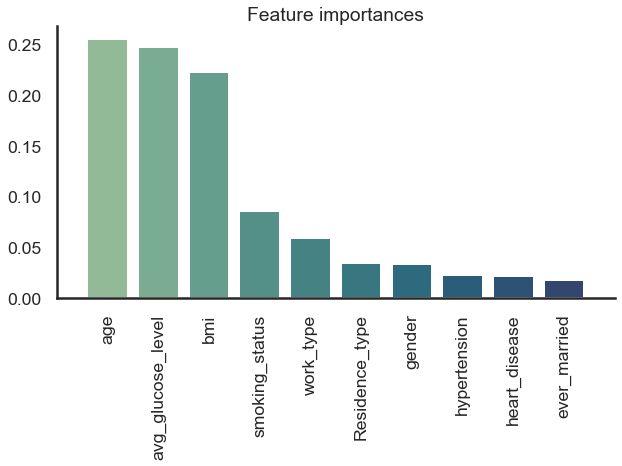

In [31]:
features = ['gender', 
           'age', 
           'hypertension', 
           'heart_disease',
           'ever_married', 
           'work_type',
           'Residence_type',
           'avg_glucose_level',
           'bmi',
           'smoking_status',]

X = df[features]
y = df['stroke']

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(10,5))

plt.title("Feature importances")
sns.barplot(x = np.array(features)[indices], y = importances[indices], palette = "crest")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
sns.despine();
plt.show()

### Features Scaling of Continous Numerical Features

with using StandardScaler() of sklearn for standization.

In [32]:
# Numerical Features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Standization via StandardScaler() 
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df[num_features]

,age,avg_glucose_level,bmi
0,1.039513,1.780170,1.060101
1,0.779567,1.543029,0.005977
2,1.602729,0.542872,0.506010
3,0.259675,1.359290,0.762784
4,1.559405,1.367436,-0.656229
...,...,...,...
5105,1.602729,-0.473576,0.005977
5106,1.646054,1.037972,1.519591
5107,-0.346866,-0.515212,0.249236
5108,0.346323,1.339377,-0.439999


In [33]:
# Remove 'id' columns
df = df.drop(columns = 'id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.039513,0,1,1,2,1,1.780170,1.060101,1,1
1,0,0.779567,0,0,1,3,0,1.543029,0.005977,2,1
2,1,1.602729,0,1,1,2,0,0.542872,0.506010,2,1
3,0,0.259675,0,0,1,2,1,1.359290,0.762784,3,1
4,0,1.559405,1,0,1,3,0,1.367436,-0.656229,2,1


 - The feature engineering is clear! Next we are going to split the train-test set

## Split data with using train_test_split() 
form sklarn library and SMOT (oversampling for fix inbalance of dataset)

In [34]:
X , y = df[features], df["stroke"]

# Splite data by train_test_split form sklearn into the model 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                 random_state = 7,
                                                 shuffle = True)

# Training set
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
# Testing set
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (4088, 10)
y_train: (4088,)
x_test: (1022, 10)
y_test: (1022,)


### SMOT (Synthetic Minority Oversampling Technique)
One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples.

In [35]:
# SMOT by imblearn.over_sampling smote()
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7778, 10)
After OverSampling, the shape of train_y: (7778,) 

After OverSampling, counts of label '1': 3889
After OverSampling, counts of label '0': 3889


# Modeling 



## Library for modeling

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score ,accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix

### Comparing SMOT training data modeling and wihtout SMOT training data modeling
I test this for comparing which it work.

In [37]:
# running model wihtout trainng data SMOT (logistic modeling)
lr = LogisticRegression() 
lr.fit(x_train,y_train)
model_pred = lr.predict(x_test)
cm_model = confusion_matrix(y_test, model_pred)
print(cm_model)
(accuracy_score(y_test,lr.predict(x_test)))
print('Validation Acuuracy: ', accuracy_score(y_test, lr.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_train, lr.predict(x_train)))
print('############################################')

[[972   0]
 [ 50   0]]
Validation Acuuracy:  0.9510763209393346
Training Accuracy:  0.951320939334638
############################################


In [38]:
# running model wiht trainng data SMOT (logistic modeling)
lr = LogisticRegression()
lr.fit(X_res, y_res)
model_pred = lr.predict(x_test)
cm_model = confusion_matrix(y_test, model_pred)
print(cm_model)
(accuracy_score(y_test,lr.predict(x_test)))
print('Validation Acuuracy: ', accuracy_score(y_test, lr.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_res, lr.predict(X_res)))
print('############################################')

[[710 262]
 [ 12  38]]
Validation Acuuracy:  0.7318982387475538
Training Accuracy:  0.7901774235021857
############################################


#### Result form comparing 
    - Modeling with SMOT has scoring (Validation Acuuracy) lower than modeling without SMOT.
    - Range of modeling with SMOT between Validation Acuuracy and Training Accuracy is more than modeling without SMOT.

** So, we have unnecessary to use SMOT training data for modeling in this dataset. ** 

## 1. Logistic Regression modeling

LogisticRegression
confusion_matrix: 
 [[972   0]
 [ 50   0]]
Training Accuracy:  0.951320939334638
Validation Acuuracy:  0.9510763209393346
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3889
           1       1.00      0.00      0.00       199

    accuracy                           0.95      4088
   macro avg       0.98      0.50      0.49      4088
weighted avg       0.95      0.95      0.93      4088



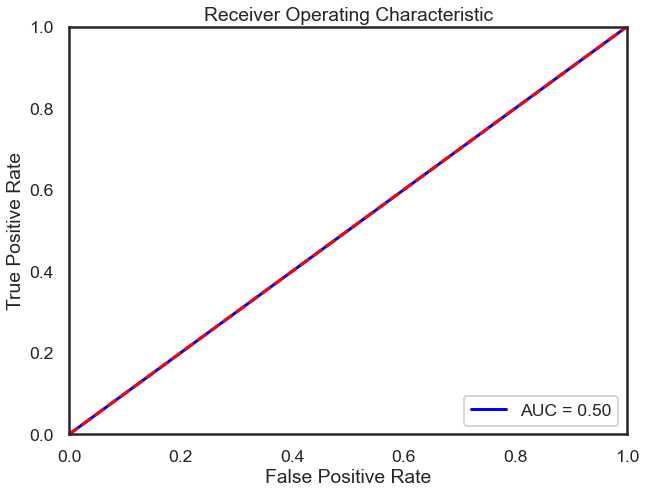

In [39]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

cm_model = confusion_matrix(y_test, y_pred)
print('LogisticRegression')
print('confusion_matrix: \n', cm_model)
(accuracy_score(y_test, lr.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_train, lr.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, lr.predict(x_test)))
print('classification_report: \n', classification_report(y_train, lr.predict(x_train), zero_division = 1 ))

# call out True Positive Rate and False Positive Rate for ploting ROC curve and calculation auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve 
fig = plt.figure(figsize=(10, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. K-Neighbors Classifier modeling

KNeighborsClassifier
confusion_matrix: 
 [[966   6]
 [ 49   1]]
Training Accuracy:  0.9522994129158513
Validation Acuuracy:  0.9461839530332681
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3889
           1       0.64      0.05      0.08       199

    accuracy                           0.95      4088
   macro avg       0.80      0.52      0.53      4088
weighted avg       0.94      0.95      0.93      4088



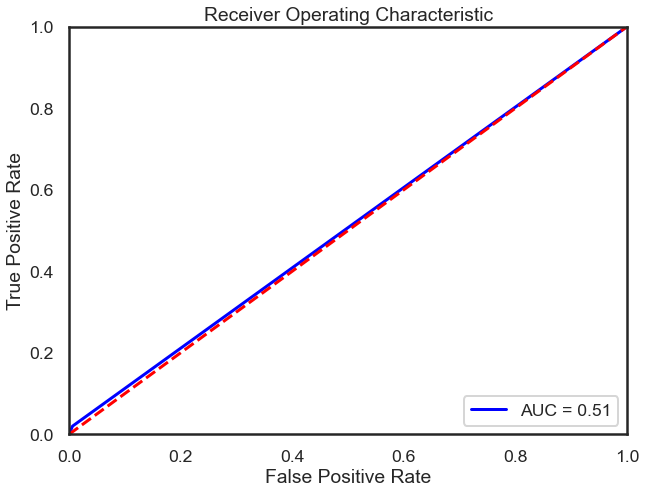

In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

cm_model = confusion_matrix(y_test, y_pred)
print('KNeighborsClassifier')
print('confusion_matrix: \n', cm_model)
(accuracy_score(y_test,knn.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_train, knn.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, knn.predict(x_test)))
print('classification_report: \n', classification_report(y_train, knn.predict(x_train), zero_division = 1 ))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3. Support Vector Classifier

SupportVectorClassifier
confusion_matrix: 
 [[972   0]
 [ 50   0]]
Training Accuracy:  0.951320939334638
Validation Acuuracy:  0.9510763209393346
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3889
           1       1.00      0.00      0.00       199

    accuracy                           0.95      4088
   macro avg       0.98      0.50      0.49      4088
weighted avg       0.95      0.95      0.93      4088



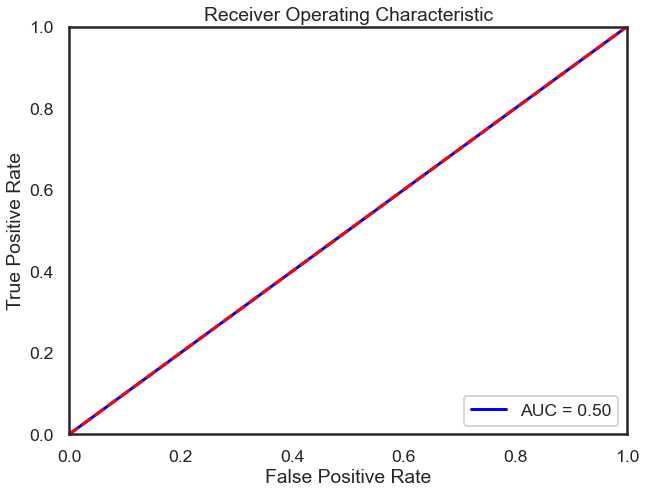

In [41]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

cm_model = confusion_matrix(y_test, y_pred)
print('SupportVectorClassifier')
print('confusion_matrix: \n', cm_model)
(accuracy_score(y_test, svc.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_train, svc.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, svc.predict(x_test)))
print('classification_report: \n', classification_report(y_train, svc.predict(x_train), zero_division = 1 ))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4. Random Forest Classifier

RandomForestClassifier
confusion_matrix: 
 [[971   1]
 [ 50   0]]
Training Accuracy:  1.0
Validation Acuuracy:  0.9500978473581213
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      1.00      1.00       199

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



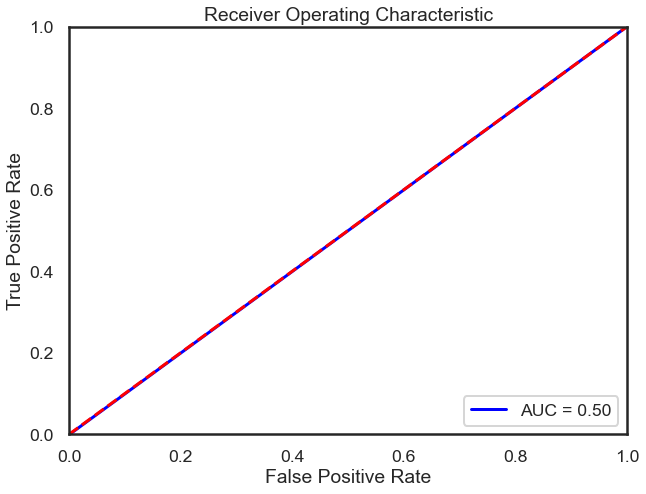

In [42]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

cm_model = confusion_matrix(y_test, y_pred)
print('RandomForestClassifier')
print('confusion_matrix: \n', cm_model)
(accuracy_score(y_test, rf.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_train, rf.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, rf.predict(x_test)))
print('classification_report: \n', classification_report(y_train, rf.predict(x_train), zero_division = 1 ))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. XGBoost Classifier

XGBoostClassifier
confusion_matrix: 
 [[963   9]
 [ 48   2]]
Training Accuracy:  0.9985322896281801
Validation Acuuracy:  0.9442270058708415
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      0.97      0.98       199

    accuracy                           1.00      4088
   macro avg       1.00      0.98      0.99      4088
weighted avg       1.00      1.00      1.00      4088



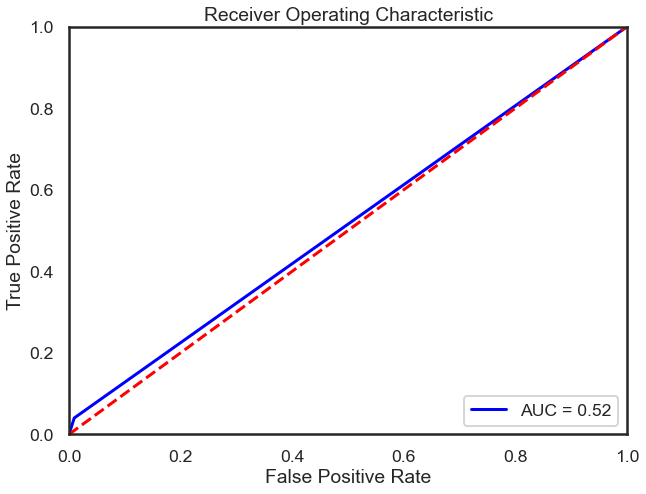

In [43]:
xgb = XGBClassifier(use_label_encoder=False, 
                    objective='binary:logistic',
                    eval_metric = "logloss")
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

cm_model = confusion_matrix(y_test, y_pred)
print('XGBoostClassifier')
print('confusion_matrix: \n', cm_model)
(accuracy_score(y_test, xgb.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_train, xgb.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, xgb.predict(x_test)))
print('classification_report: \n', classification_report(y_train, xgb.predict(x_train), zero_division = 1 ))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 6. LightGBM Classifier

LightGBMClassifier
confusion_matrix: 
 [[966   6]
 [ 48   2]]
Training Accuracy:  0.9963307240704501
Validation Acuuracy:  0.9471624266144814
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      0.92      0.96       199

    accuracy                           1.00      4088
   macro avg       1.00      0.96      0.98      4088
weighted avg       1.00      1.00      1.00      4088



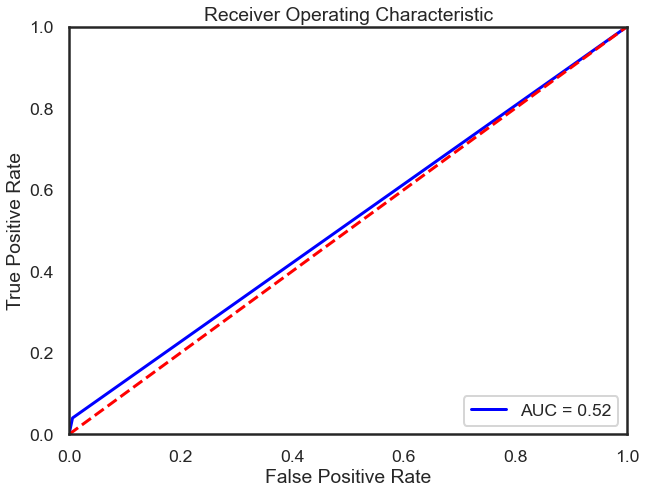

In [44]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

cm_model = confusion_matrix(y_test, y_pred)
print('LightGBMClassifier')
print('confusion_matrix: \n', cm_model)
(accuracy_score(y_test, lgb.predict(x_test)))
print('Training Accuracy: ', accuracy_score(y_train, lgb.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, lgb.predict(x_test)))
print('classification_report: \n', classification_report(y_train, lgb.predict(x_train), zero_division = 1 ))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10, 7.5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Cross Validation

In [45]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

kfold = KFold(n_splits=10, random_state=2020, shuffle=True)

In [46]:
mean = []
accuracy = []
std = []
classifiers=['Logistic Regression',
             'KNeighbors',
             'SVC',
             'Random Forest',
             'XGB',
             'LGBM']

models=[LogisticRegression(),
        KNeighborsClassifier(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier(use_label_encoder=False, 
                      objective='binary:logistic',
                      eval_metric = "logloss"),
        LGBMClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':mean, 'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.951272,0.010372
KNeighbors,0.946771,0.012277
SVC,0.951272,0.010372
Random Forest,0.950098,0.010140
XGB,0.942857,0.012057
LGBM,0.946771,0.010959


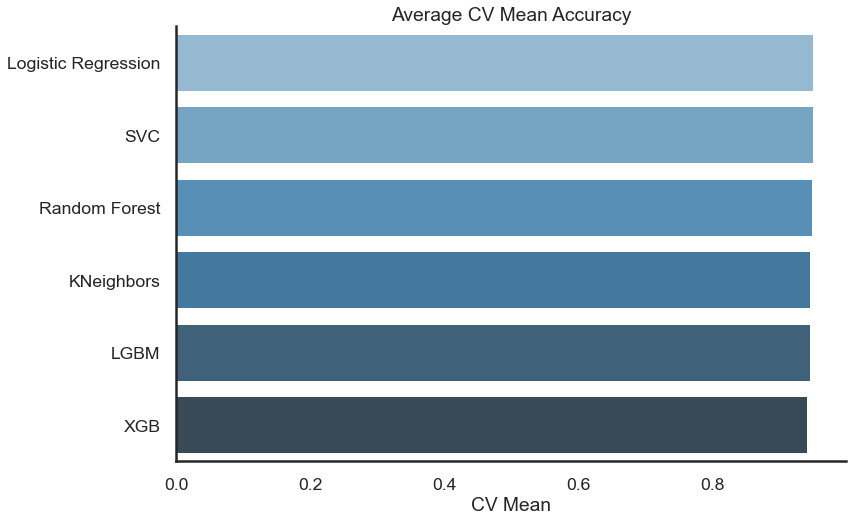

In [47]:
# plot CV mean accuracy of medels
cv_mean_sorted = new_models_dataframe2.sort_values('CV Mean', ascending = False)
cv_mean_sorted

ax = sns.barplot(y = cv_mean_sorted.index, 
            x = cv_mean_sorted['CV Mean'], 
            palette = "Blues_d")
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.despine()
plt.show();

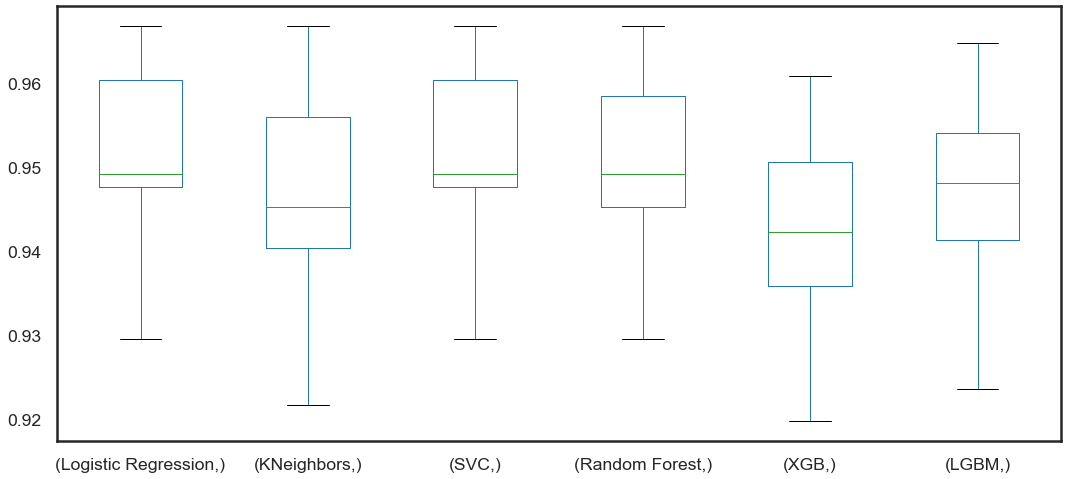

In [48]:
# plot mean and std of cross validation each of model
plt.subplots(figsize=(18, 8))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()
plt.grid(b=None);

- Logistic Regression, K-Neighnor Classifier and SVC have trining accuracy nearby validation acuracy (scoring), so we can apply to using.
- Random Forest, XGBoost, LightGBM have more  different of training acuracy with scoring, so if we choose these model to using. we have to tune hyperparameter untill they have got trining accuracy nearby validation acuracy (scoring) or that are Overfitting.

    - The model have to heperarameter tuning:
        1. Random Forest
        2. XGBoost
        3. LightGBM

## Hyperparameter Tuning

### Library for Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

### 1. Random Forest

In [50]:
def rf_tuning(new_features,labels):
    
    list_scores_rf=[]    
    
    parameters = {  
                    'max_depth': [3, 5, 7, 9], 
                    'n_estimators': [5, 10, 15, 20, 25, 50],
                    'min_samples_leaf':[1, 2, 3, 4, 5],
                    'min_samples_split':[2, 3, 4, 5]
    }

    model_rf = RandomForestClassifier()
    
    scores = ['f1']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        rf_clf = GridSearchCV(model_rf, 
                              parameters,
                              cv = 5, 
                              scoring ='%s_macro' % score)
        
        rf_clf.fit(new_features, labels)

        print(rf_clf.cv_results_['mean_test_score']) 
        print(rf_clf.cv_results_['std_test_score'])

        list_scores_rf.append([rf_clf.cv_results_['mean_test_score'][rf_clf.best_index_],
                                rf_clf.cv_results_['std_test_score'][rf_clf.best_index_]])
        
    return rf_clf, list_scores_rf

In [51]:
rf_clf, list_scores_rf = rf_tuning(x_train, y_train)

# Tuning hyper-parameters for f1

[0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.4874623  0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.48752665 0.487

In [52]:
list_scores_rf
# the first col = mean_test_score of cross validation result.
# the second col = std_test_score of cross validation result.

[[0.5199692554609858, 0.012870952085367227]]

In [53]:
# Show out Training Accuracy and Validation Acuuracy (Scoring)
print('Training Accuracy: ', accuracy_score(y_train, rf_clf.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, rf_clf.predict(x_test)))

Training Accuracy:  0.958904109589041
Validation Acuuracy:  0.9452054794520548


In [54]:
# Show the best heperpameter as per our grid search
rf_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 5}

### 2. XGBoost 

In [55]:
def xgb_tuning(new_features,labels):
    
    list_scores_xgb=[]    
    
    parameters = { 
                    'max_depth': [3, 5, 7, 9], 
                    'n_estimators': [5, 10, 15, 20, 25],
                    'learning_rate': [0.01, 0.05, 0.1] 
    }

    model_xgb = XGBClassifier(objective = "binary:logistic",
                              eval_metric = "logloss",
                              use_label_encoder=False,
                              random_state = 42)
    
    scores = ['f1']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        tuned_xgb = GridSearchCV(model_xgb, 
                           parameters,
                           cv = 5, 
                           scoring ='%s_macro' % score)
        
        tuned_xgb.fit(new_features, labels)

        print(tuned_xgb.cv_results_['mean_test_score']) 
        print(tuned_xgb.cv_results_['std_test_score'])

        list_scores_xgb.append([tuned_xgb.cv_results_['mean_test_score'][tuned_xgb.best_index_],
                                tuned_xgb.cv_results_['std_test_score'][tuned_xgb.best_index_]])
        
    return tuned_xgb, list_scores_xgb

In [56]:
# call fuction tuning hyperparameter.
tuned_xgb, list_scores_xgb = xgb_tuning(x_train, y_train)

# Tuning hyper-parameters for f1

[0.4873336  0.48739787 0.48739787 0.48752665 0.48752665 0.51337306
 0.50896844 0.50449064 0.49109775 0.49116202 0.51375306 0.51321086
 0.50626807 0.50267545 0.49897754 0.52325245 0.52638187 0.50499573
 0.50598256 0.50181955 0.48752665 0.48752665 0.48752665 0.48752665
 0.48752665 0.49116202 0.48739803 0.48739803 0.49240148 0.49233721
 0.49858614 0.50299054 0.49045355 0.49970287 0.49533119 0.50176403
 0.49835044 0.49857525 0.49823538 0.49438784 0.48746238 0.48752665
 0.48752665 0.48752665 0.48752665 0.48733377 0.49233721 0.49680472
 0.4969799  0.49734081 0.50355125 0.4997677  0.49952852 0.49989664
 0.50032967 0.50593741 0.49370966 0.49415781 0.4992467  0.50357856]
[0.00026235 0.00031732 0.00031732 0.00012397 0.00012397 0.0171611
 0.01455671 0.01694151 0.00842412 0.00839725 0.02419801 0.02364687
 0.018257   0.01542514 0.01708618 0.01666074 0.02964218 0.0195141
 0.01175132 0.01430213 0.00012397 0.00012397 0.00012397 0.00012397
 0.00012397 0.00839725 0.0002

In [57]:
list_scores_xgb 
# the first col = mean_test_score of cross validation result.
# the second col = std_test_score of cross validation result.

[[0.5263818733656536, 0.029642184961364004]]

In [58]:
# Show out Training Accuracy and Validation Acuuracy (Scoring)
print('Training Accuracy: ', accuracy_score(y_train, tuned_xgb.predict(x_train)))
print('Validation Acuuracy: ', accuracy_score(y_test, tuned_xgb.predict(x_test)))

Training Accuracy:  0.958904109589041
Validation Acuuracy:  0.9471624266144814


In [59]:
# Show the best heperpameter as per our grid search
tuned_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 10}

# Refference

At the first I wanna say thank you so much for these notebook from kaggle and other sources to give me more big knowledges and make me grow up in data science way.
- https://www.kaggle.com/sh0wmaker/95-score-eda-feature-engineering-modeling
- https://www.kaggle.com/rachidyz/eda-and-modeling-for-predicting-stroke
- https://www.kaggle.com/ahmedterry/stroke-prediction-eda-classification-models
- https://www.kaggle.com/nikunjmalpani/stroke-prediction-step-by-step-guide
- https://www.kaggle.com/bhuvanchennoju/data-storytelling-auc-focus-on-strokes